In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler 

In [60]:
data = pd.read_csv("UTI_dataset/uti_data.csv")

In [61]:
data.head()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
0,1,1,yes,few,negative,negative,clear,yellow,small,negative,...,No,No,No,No,No,Admit,Yes,training,yes,0
1,2,1,no,many,negative,small,clear,yellow,not_reported,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
2,3,2,yes,few,negative,negative,clear,yellow,small,negative,...,No,No,Yes,Yes,No,Discharge,No,training,no,0
3,4,3,yes,many,negative,negative,not_clear,yellow,not_reported,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
4,5,4,no,moderate,small,negative,clear,orange,not_reported,negative,...,No,No,No,No,No,AMA,No,training,no,0


In [62]:
data.tail()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
80382,80383,55363,no,moderate,negative,large,not_reported,yellow,small,negative,...,Yes,Yes,No,Yes,No,Eloped,No,validation,yes,0
80383,80384,55363,yes,none,negative,small,not_clear,yellow,small,negative,...,No,No,No,No,No,Discharge,Yes,validation,yes,0
80384,80385,55364,no,few,negative,moderate,clear,yellow,not_reported,negative,...,No,No,No,No,No,Discharge,No,validation,no,0
80385,80386,55364,yes,few,negative,negative,not_reported,yellow,small,negative,...,No,No,No,Yes,Yes,Admit,No,validation,yes,0
80386,80387,55365,yes,marked,large,large,not_reported,other,small,negative,...,No,No,Yes,Yes,Yes,Admit,No,validation,yes,0


In [63]:
selected_features = [
    'dysuria', 'polyuria', 'fever', 'fatigue', 'hematuria', 'flank_pain', 'abd_pain',
    'abx', 'Chronic_renal_failure', 'Diabetes_mellitus_without_complication', 
    'Diabetes_mellitus_with_complications', 'WBC', 'Creatinine', 'age'
]

In [64]:
target_variable = 'UTI_diag'

In [65]:
required_data = data[selected_features+[target_variable]]
print(required_data)

            dysuria      polyuria         fever       fatigue     hematuria  \
0      not_reported  not_reported             0             0  not_reported   
1      not_reported  not_reported  not_reported             1  not_reported   
2      not_reported  not_reported  not_reported  not_reported  not_reported   
3                 0  not_reported             1             1  not_reported   
4                 0  not_reported             0             0             0   
...             ...           ...           ...           ...           ...   
80382  not_reported  not_reported             1  not_reported  not_reported   
80383  not_reported  not_reported  not_reported  not_reported  not_reported   
80384             0  not_reported             0  not_reported  not_reported   
80385  not_reported  not_reported             0             0             0   
80386  not_reported  not_reported             0             0             0   

         flank_pain      abd_pain  abx Chronic_rena

In [66]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80387 entries, 0 to 80386
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   dysuria                                 80387 non-null  object
 1   polyuria                                80387 non-null  object
 2   fever                                   80387 non-null  object
 3   fatigue                                 80387 non-null  object
 4   hematuria                               80387 non-null  object
 5   flank_pain                              80387 non-null  object
 6   abd_pain                                80387 non-null  object
 7   abx                                     80387 non-null  object
 8   Chronic_renal_failure                   80387 non-null  object
 9   Diabetes_mellitus_without_complication  80387 non-null  object
 10  Diabetes_mellitus_with_complications    80387 non-null  object
 11  WB

In [67]:
required_data.describe()

,age
count,80387.000000
mean,53.801436
std,22.250829
min,18.000000
25%,34.000000
50%,53.000000
75%,72.000000
max,109.000000


In [68]:
required_data['dysuria']

0        not_reported
1        not_reported
2        not_reported
3                   0
4                   0
             ...     
80382    not_reported
80383    not_reported
80384               0
80385    not_reported
80386    not_reported
Name: dysuria, Length: 80387, dtype: object

In [69]:
unique_classes = required_data['dysuria'].unique()
print("Unique classes in 'dysuria':", unique_classes)


Unique classes in 'dysuria': ['not_reported' '0' '1']


In [70]:
type(required_data)

pandas.core.frame.DataFrame

In [ ]:
for line in required_data["dysuria"]:
    print(line)

not_reported
not_reported
not_reported
0
0
0
1
not_reported
0
1
not_reported
0
not_reported
0
not_reported
not_reported
not_reported
not_reported
0
not_reported
not_reported
1
not_reported
not_reported
not_reported
1
0
not_reported
not_reported
not_reported
1
not_reported
0
0
not_reported
1
0
1
not_reported
0
1
0
0
0
0
0
1
1
0
not_reported
0
1
not_reported
not_reported
not_reported
0
0
not_reported
not_reported
not_reported
0
not_reported
not_reported
0
not_reported
1
not_reported
not_reported
not_reported
0
not_reported
not_reported
1
0
not_reported
not_reported
0
0
not_reported
not_reported
not_reported
not_reported
1
not_reported
not_reported
1
not_reported
not_reported
1
not_reported
0
0
not_reported
1
0
not_reported
0
1
not_reported
not_reported
0
0
0
not_reported
0
not_reported
1
0
not_reported
1
0
0
not_reported
1
0
not_reported
0
1
not_reported
0
0
not_reported
1
0
not_reported
not_reported
0
not_reported
not_reported
not_reported
0
not_reported
not_reported
0
0
not_reported
1


In [82]:
required_data["dysuria"] = required_data["dysuria"].replace("not_reported", -1)


In [83]:
required_data = required_data[required_data['dysuria'] != -1]

In [84]:
required_data

,dysuria,polyuria,fever,fatigue,hematuria,flank_pain,abd_pain,abx,Chronic_renal_failure,Diabetes_mellitus_without_complication,Diabetes_mellitus_with_complications,WBC,Creatinine,age,UTI_diag
3,0,not_reported,1,1,not_reported,not_reported,0,Yes,No,No,No,4,4,84,Yes
4,0,not_reported,0,0,0,not_reported,1,No,No,No,No,4,1,55,No
5,0,not_reported,0,1,0,not_reported,1,No,No,No,No,1,3,47,No
6,1,not_reported,1,0,not_reported,not_reported,0,Yes,No,No,No,4,3,64,Yes
8,0,not_reported,1,1,0,0,0,Yes,No,No,No,2,3,83,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80372,1,not_reported,1,not_reported,not_reported,0,0,No,No,No,No,3,3,69,No
80376,0,not_reported,0,not_reported,not_reported,1,0,No,No,No,No,5,3,41,No
80378,0,not_reported,1,0,1,0,0,Yes,No,Yes,No,1,3,64,Yes
80379,0,0,0,not_reported,0,0,0,Yes,No,No,No,not_reported,not_reported,29,Yes


In [85]:
required_data['polyuria']

3        not_reported
4        not_reported
5        not_reported
6        not_reported
8        not_reported
             ...     
80372    not_reported
80376    not_reported
80378    not_reported
80379               0
80384    not_reported
Name: polyuria, Length: 45741, dtype: object

In [86]:
unique_classes = required_data['polyuria'].unique()
print("Unique classes in 'polyuria':", unique_classes)

Unique classes in 'polyuria': ['not_reported' '1' '0']


In [87]:
required_data["polyuria"] = required_data["polyuria"].replace("not_reported", -1)

In [91]:
required_data = required_data[required_data['polyuria'] != -1]

In [93]:

for column in required_data.columns:
    unique_classes = required_data[column].unique()  # Get number of unique values in the column
    print(f"Column: {column} - Number of unique classes: {unique_classes}")


Column: dysuria - Number of unique classes: ['0' '1']
Column: polyuria - Number of unique classes: ['1' '0']
Column: fever - Number of unique classes: ['0' '1' 'not_reported']
Column: fatigue - Number of unique classes: ['not_reported' '1' '0']
Column: hematuria - Number of unique classes: ['0' 'not_reported' '1']
Column: flank_pain - Number of unique classes: ['0' 'not_reported' '1']
Column: abd_pain - Number of unique classes: ['0' 'not_reported' '1']
Column: abx - Number of unique classes: ['Yes' 'No']
Column: Chronic_renal_failure - Number of unique classes: ['No' 'Yes']
Column: Diabetes_mellitus_without_complication - Number of unique classes: ['No' 'Yes']
Column: Diabetes_mellitus_with_complications - Number of unique classes: ['No' 'Yes']
Column: WBC - Number of unique classes: ['not_reported' '1' '5' '2' '3' '4']
Column: Creatinine - Number of unique classes: ['not_reported' '2' '3' '1' '4' '5']
Column: age - Number of unique classes: [ 68  64  82  34  22  46  55  92  40  30  4

In [97]:
not_reported_columns = ["flank_pain","fever","fatigue","hematuria","hematuria","abd_pain","WBC","Creatinine"]

In [98]:
for column in not_reported_columns:
    required_data = required_data[required_data[column] != "not_reported"]

In [99]:
required_data

,dysuria,polyuria,fever,fatigue,hematuria,flank_pain,abd_pain,abx,Chronic_renal_failure,Diabetes_mellitus_without_complication,Diabetes_mellitus_with_complications,WBC,Creatinine,age,UTI_diag
412,1,1,0,0,0,1,0,Yes,No,No,No,1,3,92,Yes
606,0,0,1,0,0,0,1,Yes,No,No,No,5,3,19,Yes
800,1,0,0,1,0,0,0,Yes,Yes,Yes,No,3,3,62,Yes
803,0,0,0,0,0,1,0,No,No,No,No,2,2,62,No
805,0,0,0,0,0,0,1,No,No,No,No,1,1,35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79653,0,0,1,1,0,0,0,No,No,No,No,1,3,71,No
79796,0,0,0,1,0,0,0,Yes,No,No,No,5,1,26,Yes
80090,0,0,0,0,0,0,1,No,No,No,No,1,3,28,No
80205,0,0,0,1,0,0,0,No,No,No,No,2,4,79,No


In [100]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 412 to 80207
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   dysuria                                 413 non-null    object
 1   polyuria                                413 non-null    object
 2   fever                                   413 non-null    object
 3   fatigue                                 413 non-null    object
 4   hematuria                               413 non-null    object
 5   flank_pain                              413 non-null    object
 6   abd_pain                                413 non-null    object
 7   abx                                     413 non-null    object
 8   Chronic_renal_failure                   413 non-null    object
 9   Diabetes_mellitus_without_complication  413 non-null    object
 10  Diabetes_mellitus_with_complications    413 non-null    object
 11  WBC    

In [101]:
required_data.describe()

,age
count,413.000000
mean,48.404358
std,20.687074
min,18.000000
25%,31.000000
50%,47.000000
75%,63.000000
max,97.000000


In [102]:
label_encoding_required = ["abx","Chronic_renal_failure","Diabetes_mellitus_without_complication","Diabetes_mellitus_with_complications","UTI_diag"]

In [103]:
le = LabelEncoder()


In [105]:
for column in label_encoding_required:
        required_data[column] = le.fit_transform(required_data[column])

In [106]:
required_data

,dysuria,polyuria,fever,fatigue,hematuria,flank_pain,abd_pain,abx,Chronic_renal_failure,Diabetes_mellitus_without_complication,Diabetes_mellitus_with_complications,WBC,Creatinine,age,UTI_diag
412,1,1,0,0,0,1,0,1,0,0,0,1,3,92,1
606,0,0,1,0,0,0,1,1,0,0,0,5,3,19,1
800,1,0,0,1,0,0,0,1,1,1,0,3,3,62,1
803,0,0,0,0,0,1,0,0,0,0,0,2,2,62,0
805,0,0,0,0,0,0,1,0,0,0,0,1,1,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79653,0,0,1,1,0,0,0,0,0,0,0,1,3,71,0
79796,0,0,0,1,0,0,0,1,0,0,0,5,1,26,1
80090,0,0,0,0,0,0,1,0,0,0,0,1,3,28,0
80205,0,0,0,1,0,0,0,0,0,0,0,2,4,79,0


In [107]:

for column in required_data.columns:
    unique_classes = required_data[column].unique()  # Get number of unique values in the column
    print(f"Column: {column} - Number of unique classes: {unique_classes}")

Column: dysuria - Number of unique classes: ['1' '0']
Column: polyuria - Number of unique classes: ['1' '0']
Column: fever - Number of unique classes: ['0' '1']
Column: fatigue - Number of unique classes: ['0' '1']
Column: hematuria - Number of unique classes: ['0' '1']
Column: flank_pain - Number of unique classes: ['1' '0']
Column: abd_pain - Number of unique classes: ['0' '1']
Column: abx - Number of unique classes: [1 0]
Column: Chronic_renal_failure - Number of unique classes: [0 1]
Column: Diabetes_mellitus_without_complication - Number of unique classes: [0 1]
Column: Diabetes_mellitus_with_complications - Number of unique classes: [0 1]
Column: WBC - Number of unique classes: ['1' '5' '3' '2' '4']
Column: Creatinine - Number of unique classes: ['3' '2' '1' '4' '5']
Column: age - Number of unique classes: [92 19 62 35 48 38 42 37 52 87 80 44 29 76 70 34 46 32 93 61 20 91 33 31
 55 84 28 25 23 74 64 60 51 53 21 47 22 40 54 68 71 45 49 66 81 75 79 50
 26 56 65 67 77 36 83 43 27 86

In [111]:
scaler = StandardScaler()

In [114]:
required_data["age"] = scaler.fit_transform(required_data[["age"]])

In [115]:
required_data

,dysuria,polyuria,fever,fatigue,hematuria,flank_pain,abd_pain,abx,Chronic_renal_failure,Diabetes_mellitus_without_complication,Diabetes_mellitus_with_complications,WBC,Creatinine,age,UTI_diag
412,1,1,0,0,0,1,0,1,0,0,0,1,3,2.109942,1
606,0,0,1,0,0,0,1,1,0,0,0,5,3,-1.423112,1
800,1,0,0,1,0,0,0,1,1,1,0,3,3,0.658002,1
803,0,0,0,0,0,1,0,0,0,0,0,2,2,0.658002,0
805,0,0,0,0,0,0,1,0,0,0,0,1,1,-0.648744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79653,0,0,1,1,0,0,0,0,0,0,0,1,3,1.093584,0
79796,0,0,0,1,0,0,0,1,0,0,0,5,1,-1.084326,1
80090,0,0,0,0,0,0,1,0,0,0,0,1,3,-0.987530,0
80205,0,0,0,1,0,0,0,0,0,0,0,2,4,1.480768,0


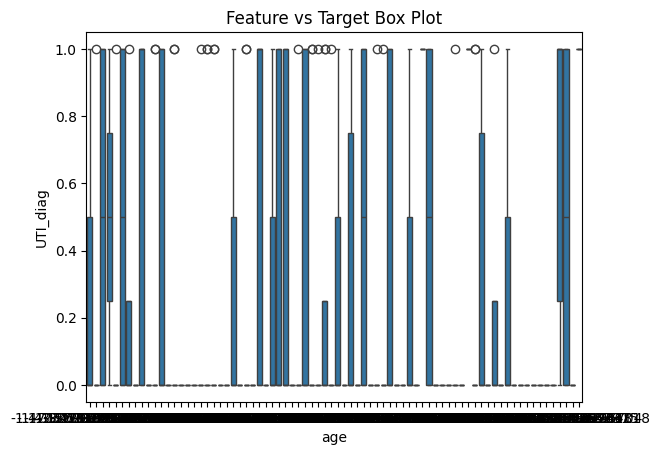

In [121]:
sns.boxplot(x='age', y='UTI_diag', data=required_data)
plt.title('Feature vs Target Box Plot')
plt.show()

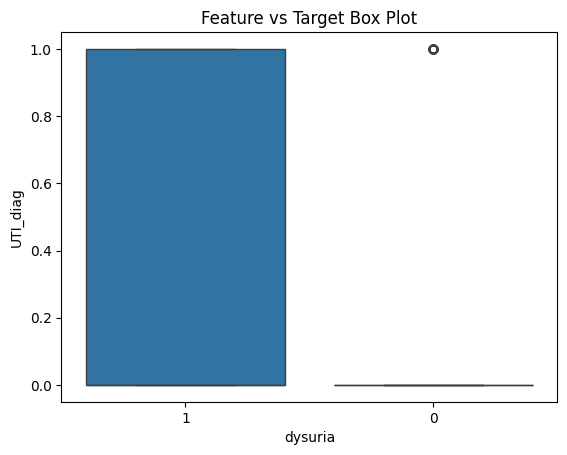

In [118]:
sns.boxplot(x='dysuria', y='UTI_diag', data=required_data)
plt.title('Feature vs Target Box Plot')
plt.show()

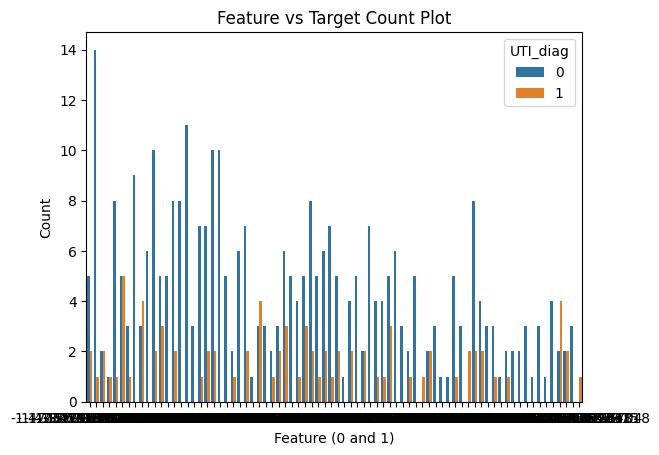

In [128]:
sns.countplot(x='age', hue='UTI_diag', data=required_data)
plt.title('Feature vs Target Count Plot')
plt.xlabel('Feature (0 and 1)')
plt.ylabel('Count')
plt.show()


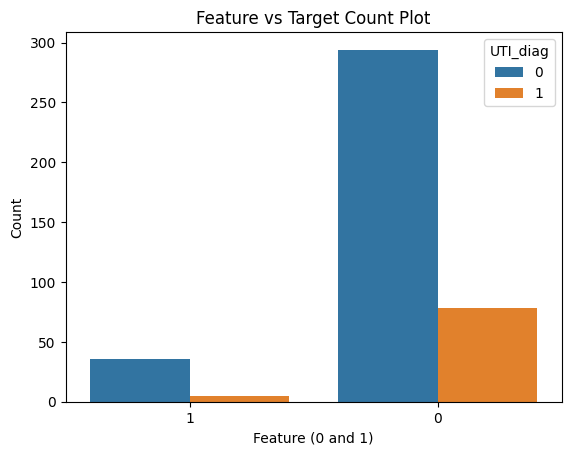

In [129]:
sns.countplot(x='polyuria', hue='UTI_diag', data=required_data)
plt.title('Feature vs Target Count Plot')
plt.xlabel('Feature (0 and 1)')
plt.ylabel('Count')
plt.show()

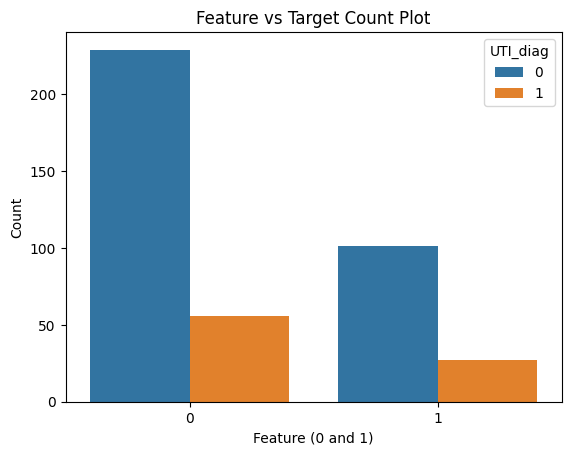

In [130]:
sns.countplot(x='fatigue', hue='UTI_diag', data=required_data)
plt.title('Feature vs Target Count Plot')
plt.xlabel('Feature (0 and 1)')
plt.ylabel('Count')
plt.show()

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Example model
from sklearn.metrics import accuracy_score, classification_report

In [133]:
X = required_data[[    'dysuria', 'polyuria', 'fever', 'fatigue', 'hematuria', 'flank_pain', 'abd_pain',
    'abx', 'Chronic_renal_failure', 'Diabetes_mellitus_without_complication', 
    'Diabetes_mellitus_with_complications', 'WBC', 'Creatinine', 'age']]  # Features (input)
y = required_data['UTI_diag'] 

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [136]:
y_pred = model.predict(X_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [138]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        63
           1       0.80      0.20      0.32        20

    accuracy                           0.80        83
   macro avg       0.80      0.59      0.60        83
weighted avg       0.80      0.80      0.74        83



In [139]:
from sklearn.tree import DecisionTreeClassifier 

In [140]:
model = DecisionTreeClassifier(random_state=42)  # You can tune the parameters if needed
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
y_pred = model.predict(X_test)

In [142]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [143]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.65      0.55      0.59        20

    accuracy                           0.82        83
   macro avg       0.76      0.73      0.74        83
weighted avg       0.81      0.82      0.81        83



In [151]:
from sklearn.ensemble import RandomForestClassifier 

In [152]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)  # You can tweak these parameters
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [153]:
y_pred = model.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [155]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        63
           1       1.00      0.05      0.10        20

    accuracy                           0.77        83
   macro avg       0.88      0.53      0.48        83
weighted avg       0.82      0.77      0.68        83

